# Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

# loading train data

In [2]:
train = pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# loading test data

In [3]:
test = pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


# counting null values

In [4]:
def null_count(a):
    null_dict = {feature:a[feature].isnull().sum() for feature in a.columns if a[feature].isnull().sum()>0}
    return null_dict

In [5]:
def null_count_percentage(b_dict,a):
        for key, val in b_dict.items():
            val_per = (val/a.shape[0])*100
            print("{0} has {1} i.e. {2}% missing data".format(key,val,np.round(val_per,2)))

In [6]:
def count_plot(b):
    plt.figure(figsize = (30, 20))
    plots = sn.barplot(x=b.keys(), y=b.values())
#plt.bar(null_train.keys(),null_train.values())

    for bar in plots.patches:
        plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=20, xytext=(0, 8),
                   textcoords='offset points')
    plt.xlabel("Features", size=20)
    plt.xticks(fontsize=20, rotation = 50)
# Setting the label for y-axis
    plt.ylabel("Counts", size=20)
    plt.yticks(fontsize=20)
# Setting the title for the graph
    plt.title("This is an annotated barplot", fontsize=20)

# Finally showing the plot
    plt.show()

# counting null value of train data

In [7]:
null_train = null_count(train)
null_train

{'LotFrontage': 259,
 'Alley': 1369,
 'MasVnrType': 872,
 'MasVnrArea': 8,
 'BsmtQual': 37,
 'BsmtCond': 37,
 'BsmtExposure': 38,
 'BsmtFinType1': 37,
 'BsmtFinType2': 38,
 'Electrical': 1,
 'FireplaceQu': 690,
 'GarageType': 81,
 'GarageYrBlt': 81,
 'GarageFinish': 81,
 'GarageQual': 81,
 'GarageCond': 81,
 'PoolQC': 1453,
 'Fence': 1179,
 'MiscFeature': 1406}

In [8]:
null_count_percentage(null_train, train)

LotFrontage has 259 i.e. 17.74% missing data
Alley has 1369 i.e. 93.77% missing data
MasVnrType has 872 i.e. 59.73% missing data
MasVnrArea has 8 i.e. 0.55% missing data
BsmtQual has 37 i.e. 2.53% missing data
BsmtCond has 37 i.e. 2.53% missing data
BsmtExposure has 38 i.e. 2.6% missing data
BsmtFinType1 has 37 i.e. 2.53% missing data
BsmtFinType2 has 38 i.e. 2.6% missing data
Electrical has 1 i.e. 0.07% missing data
FireplaceQu has 690 i.e. 47.26% missing data
GarageType has 81 i.e. 5.55% missing data
GarageYrBlt has 81 i.e. 5.55% missing data
GarageFinish has 81 i.e. 5.55% missing data
GarageQual has 81 i.e. 5.55% missing data
GarageCond has 81 i.e. 5.55% missing data
PoolQC has 1453 i.e. 99.52% missing data
Fence has 1179 i.e. 80.75% missing data
MiscFeature has 1406 i.e. 96.3% missing data


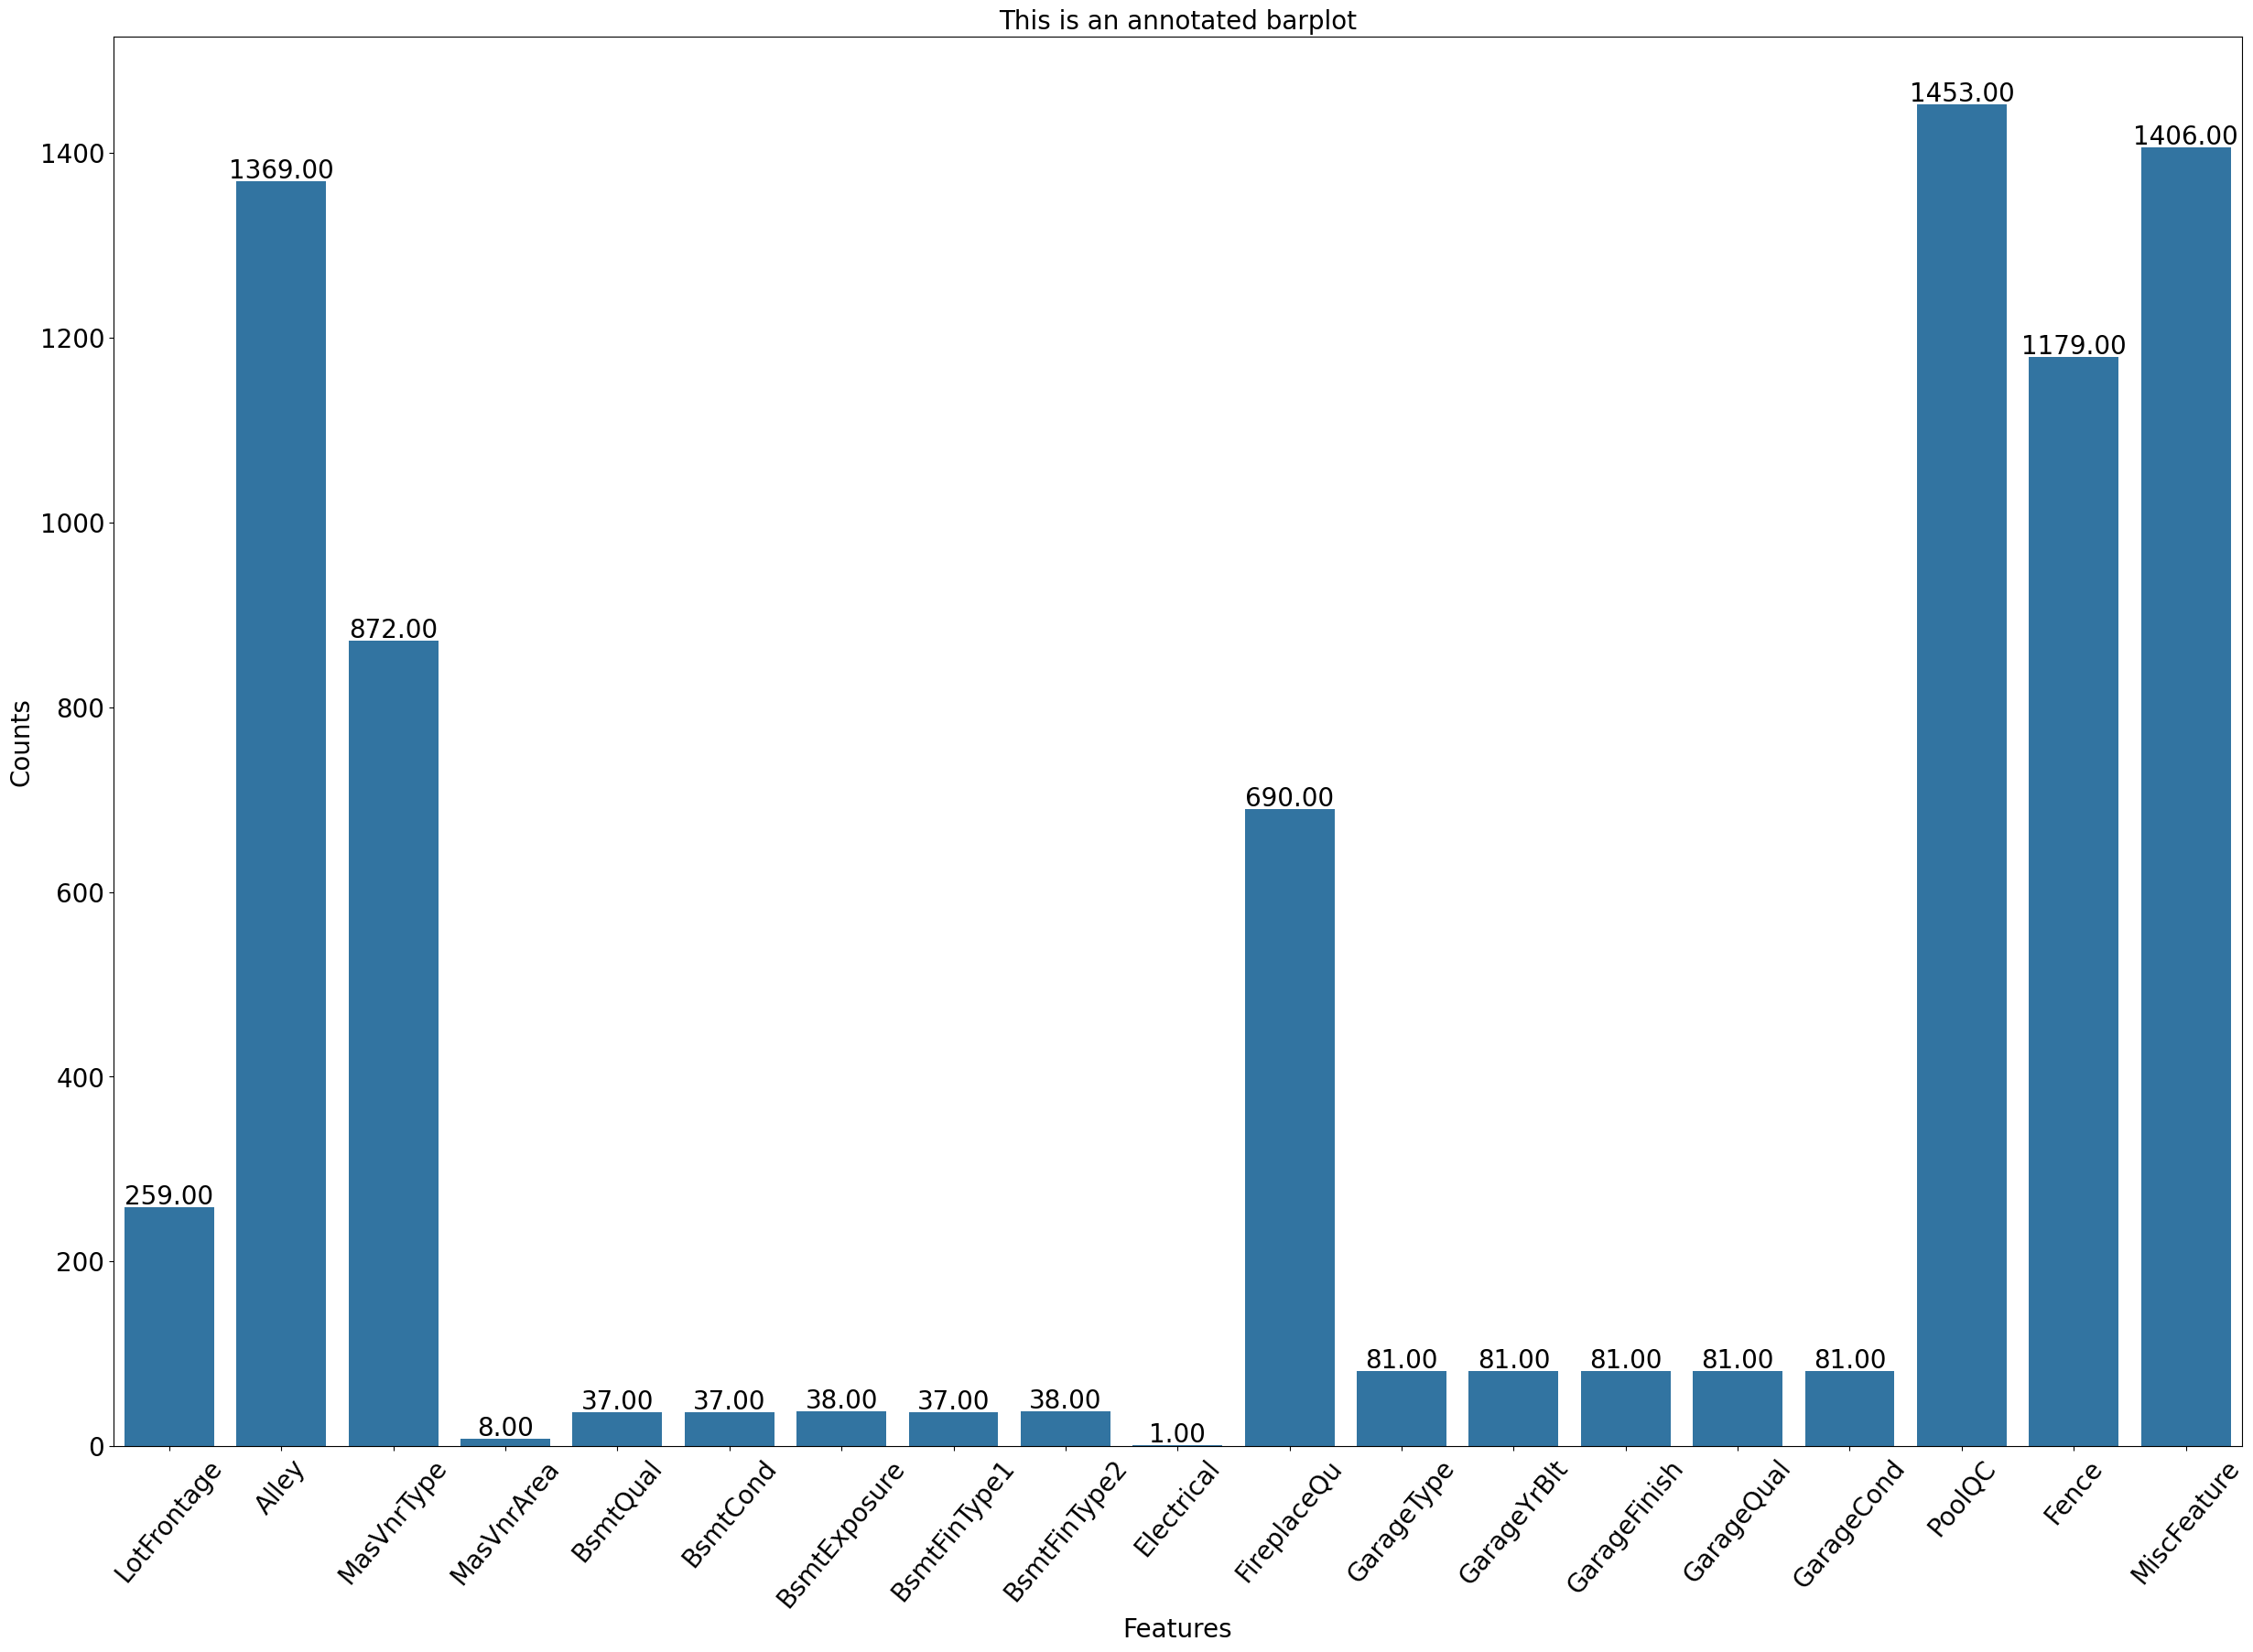

In [9]:
count_plot(null_train)

# modified train data 

In [10]:
train_modified = train.drop(['Id','Alley','MasVnrType','PoolQC','Fence','MiscFeature'], axis=1)
train_modified.shape

(1460, 75)

# checking data types

In [11]:
def data_type_check(df):
    df_int = df.select_dtypes(include = 'int64')
    df_float = df.select_dtypes(include = 'float')
    df_object = df.select_dtypes(include = 'object')
    print("Interger types:", df_int.columns)
    print("Float types:", df_float.columns)
    print("Object types:", df_object.columns)

In [12]:
train_null = list(null_train.keys())
removed_null = ['Id','Alley','MasVnrType','PoolQC','Fence','MiscFeature']
remain_train_null = list(set(train_null)-set(removed_null))
remain_train_null

['BsmtFinType1',
 'GarageYrBlt',
 'BsmtCond',
 'GarageCond',
 'LotFrontage',
 'GarageQual',
 'BsmtQual',
 'BsmtExposure',
 'GarageType',
 'BsmtFinType2',
 'FireplaceQu',
 'MasVnrArea',
 'Electrical',
 'GarageFinish']

In [13]:
data_type_check(train_modified[remain_train_null])

Interger types: Index([], dtype='object')
Float types: Index(['GarageYrBlt', 'LotFrontage', 'MasVnrArea'], dtype='object')
Object types: Index(['BsmtFinType1', 'BsmtCond', 'GarageCond', 'GarageQual', 'BsmtQual',
       'BsmtExposure', 'GarageType', 'BsmtFinType2', 'FireplaceQu',
       'Electrical', 'GarageFinish'],
      dtype='object')


In [14]:
train_modified['MasVnrArea'] = train_modified['MasVnrArea'].fillna((train_modified['MasVnrArea'].mean()))
train_modified['LotFrontage'] = train_modified['LotFrontage'].fillna((train_modified['LotFrontage'].mean()))
train_modified['GarageYrBlt'] = train_modified['GarageYrBlt'].fillna((train_modified['GarageYrBlt'].mode()[0]))

In [15]:
train_obj_null = ['BsmtQual', 'BsmtCond', 'GarageQual', 'BsmtExposure', 'BsmtFinType2', 'GarageFinish', 'Electrical', 'GarageCond', 'BsmtFinType1','FireplaceQu', 'GarageType']
for feature in train_obj_null:
    train_modified[feature] = train_modified[feature].fillna((train_modified[feature].mode()[0]))

In [16]:
train_modified.iloc[:, 0:40].isnull().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinSF1      0
BsmtFinType2    0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
Heating         0
HeatingQC       0
CentralAir      0
Electrical      0
dtype: int64

In [17]:
train_modified.iloc[:, 41:75].isnull().sum()

2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
FireplaceQu      0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
dtype: int64

# counting null value of test data

In [18]:
null_test = null_count(test)
null_test

{'MSZoning': 4,
 'LotFrontage': 227,
 'Alley': 1352,
 'Utilities': 2,
 'Exterior1st': 1,
 'Exterior2nd': 1,
 'MasVnrType': 894,
 'MasVnrArea': 15,
 'BsmtQual': 44,
 'BsmtCond': 45,
 'BsmtExposure': 44,
 'BsmtFinType1': 42,
 'BsmtFinSF1': 1,
 'BsmtFinType2': 42,
 'BsmtFinSF2': 1,
 'BsmtUnfSF': 1,
 'TotalBsmtSF': 1,
 'BsmtFullBath': 2,
 'BsmtHalfBath': 2,
 'KitchenQual': 1,
 'Functional': 2,
 'FireplaceQu': 730,
 'GarageType': 76,
 'GarageYrBlt': 78,
 'GarageFinish': 78,
 'GarageCars': 1,
 'GarageArea': 1,
 'GarageQual': 78,
 'GarageCond': 78,
 'PoolQC': 1456,
 'Fence': 1169,
 'MiscFeature': 1408,
 'SaleType': 1}

In [19]:
null_count_percentage(null_test, test)

MSZoning has 4 i.e. 0.27% missing data
LotFrontage has 227 i.e. 15.56% missing data
Alley has 1352 i.e. 92.67% missing data
Utilities has 2 i.e. 0.14% missing data
Exterior1st has 1 i.e. 0.07% missing data
Exterior2nd has 1 i.e. 0.07% missing data
MasVnrType has 894 i.e. 61.27% missing data
MasVnrArea has 15 i.e. 1.03% missing data
BsmtQual has 44 i.e. 3.02% missing data
BsmtCond has 45 i.e. 3.08% missing data
BsmtExposure has 44 i.e. 3.02% missing data
BsmtFinType1 has 42 i.e. 2.88% missing data
BsmtFinSF1 has 1 i.e. 0.07% missing data
BsmtFinType2 has 42 i.e. 2.88% missing data
BsmtFinSF2 has 1 i.e. 0.07% missing data
BsmtUnfSF has 1 i.e. 0.07% missing data
TotalBsmtSF has 1 i.e. 0.07% missing data
BsmtFullBath has 2 i.e. 0.14% missing data
BsmtHalfBath has 2 i.e. 0.14% missing data
KitchenQual has 1 i.e. 0.07% missing data
Functional has 2 i.e. 0.14% missing data
FireplaceQu has 730 i.e. 50.03% missing data
GarageType has 76 i.e. 5.21% missing data
GarageYrBlt has 78 i.e. 5.35% miss

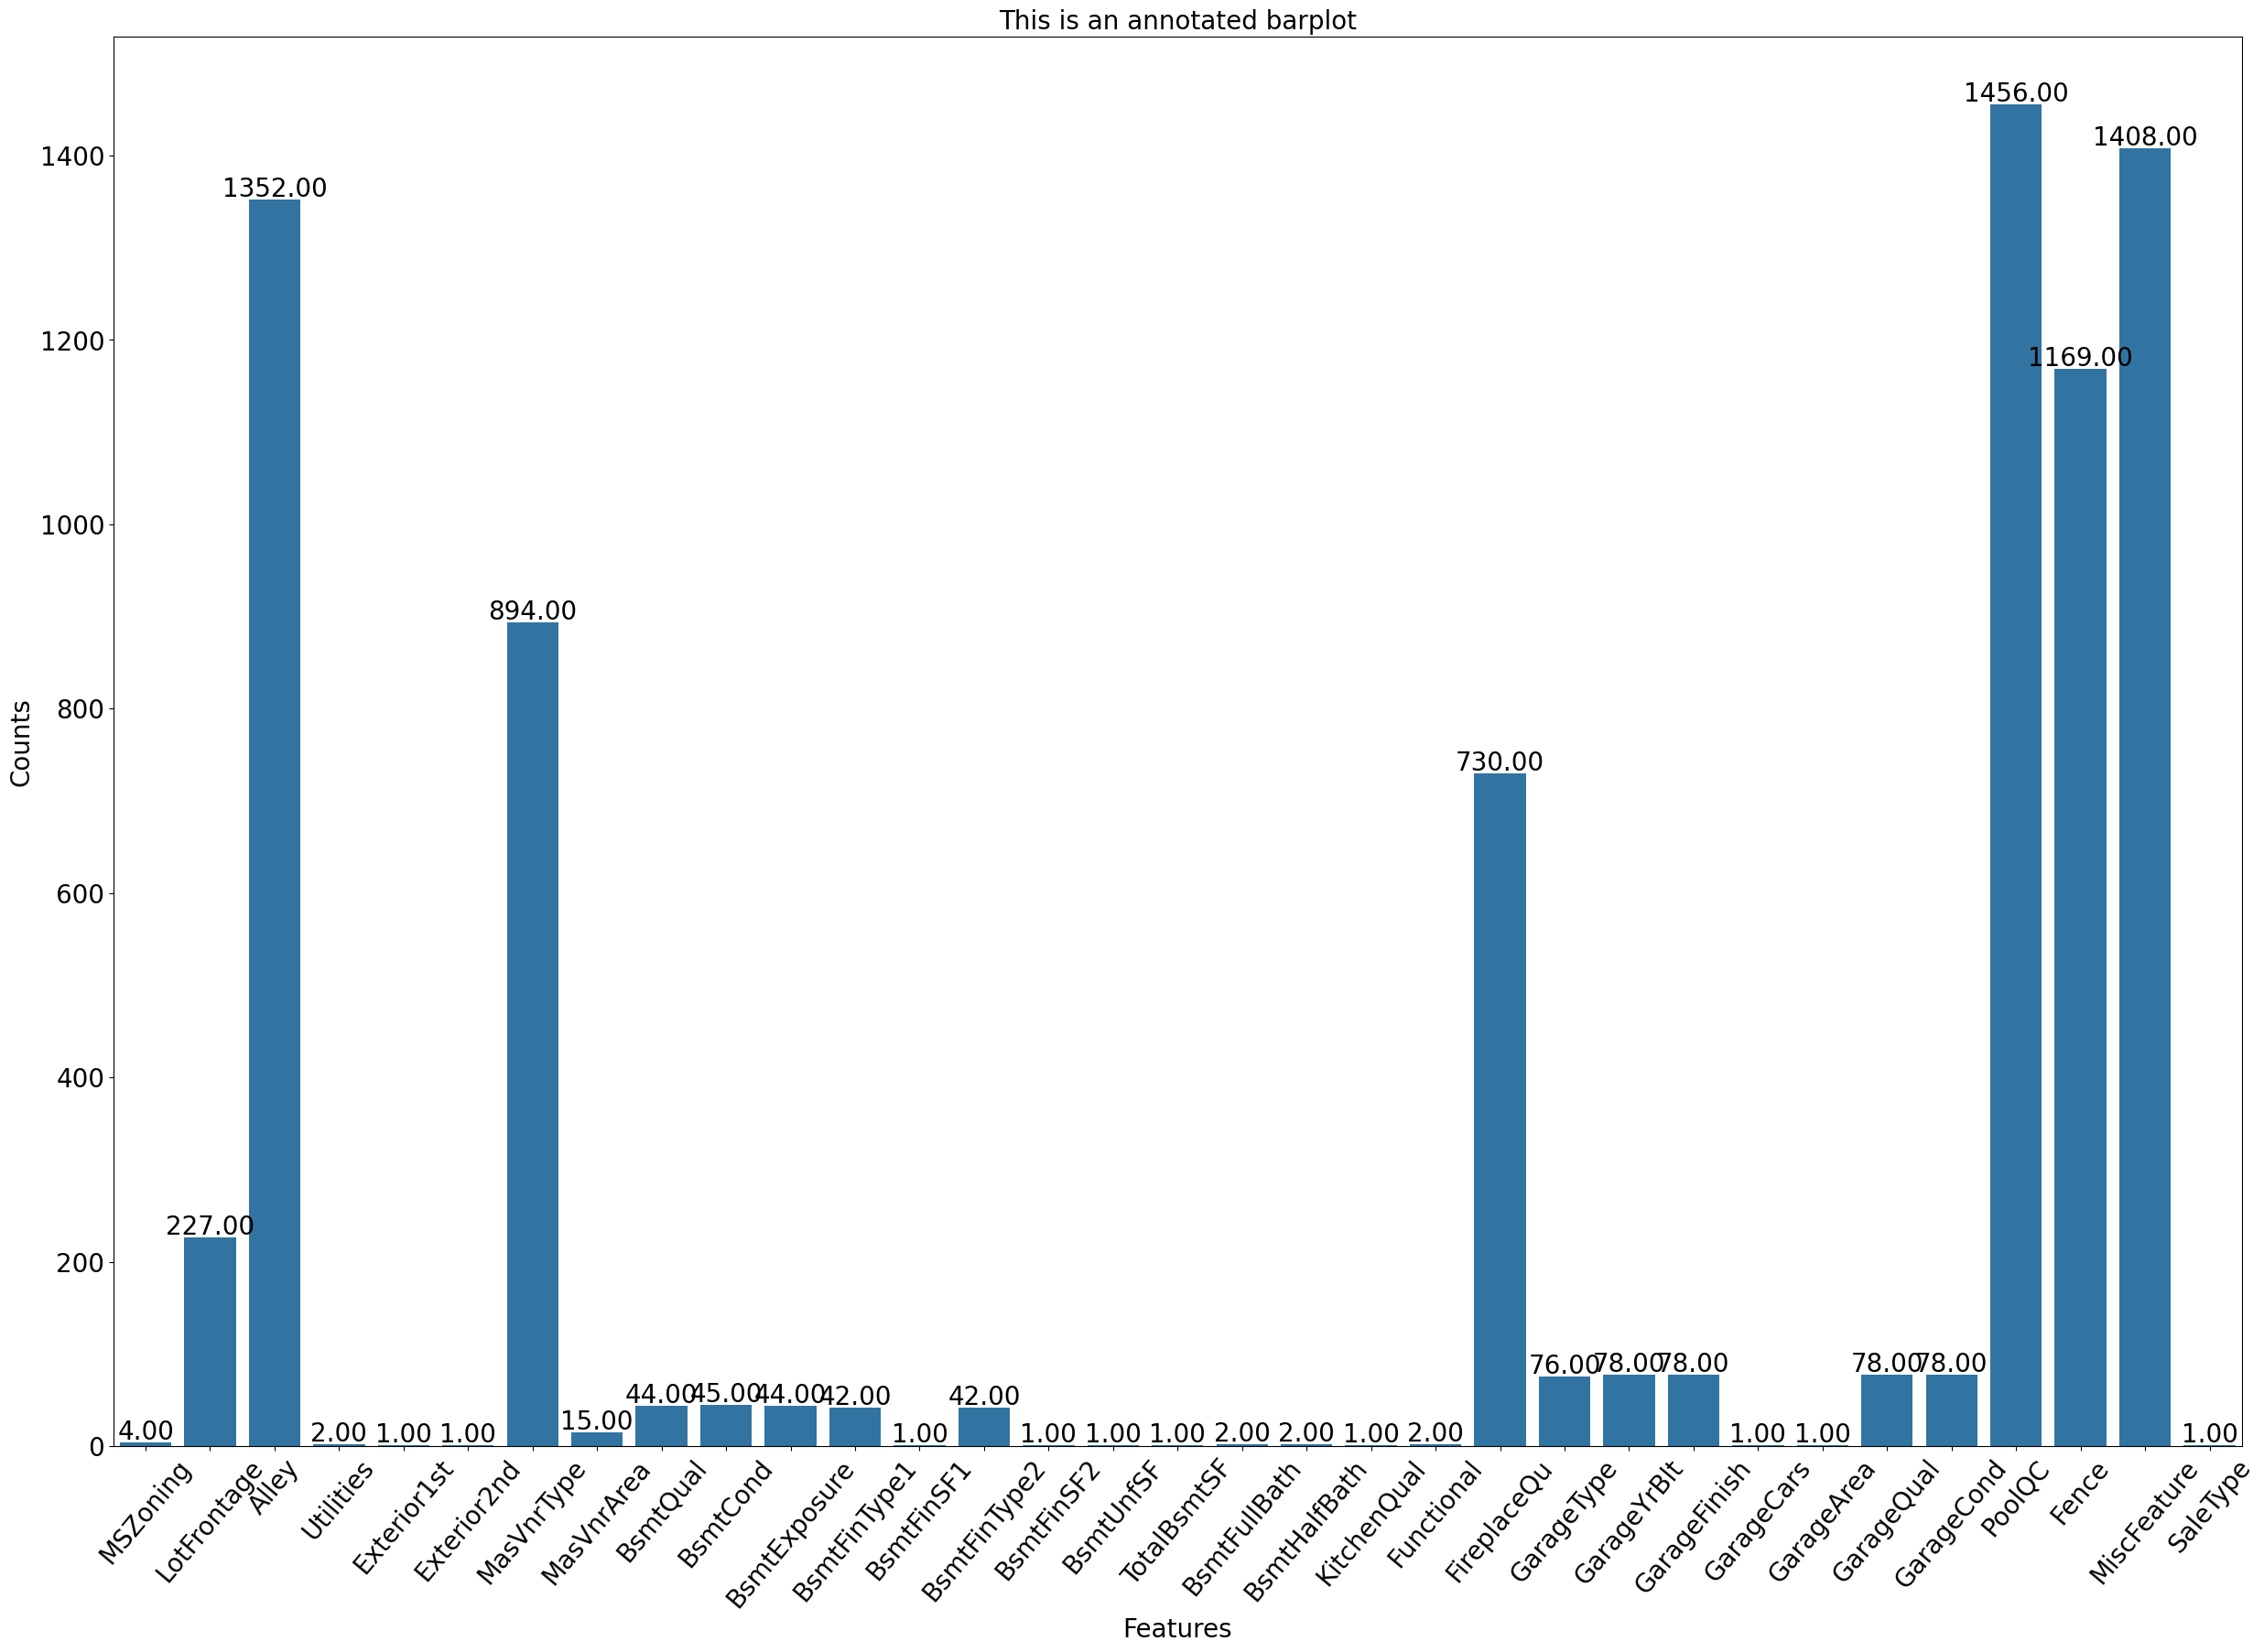

In [20]:
count_plot(null_test)

In [21]:
test_modified = test.drop(['Id', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], axis = 1)
test_modified.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [22]:
test_null = list(null_test.keys())
removed_test_null = ['Id', 'Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
remain_test_null = list(set(test_null)-set(removed_test_null))
remain_test_null

['Utilities',
 'Functional',
 'GarageArea',
 'GarageQual',
 'MSZoning',
 'BsmtExposure',
 'GarageType',
 'GarageCars',
 'GarageFinish',
 'BsmtFinType1',
 'BsmtFinSF2',
 'GarageYrBlt',
 'Exterior1st',
 'BsmtCond',
 'BsmtFinType2',
 'KitchenQual',
 'BsmtQual',
 'BsmtFullBath',
 'Exterior2nd',
 'BsmtFinSF1',
 'SaleType',
 'BsmtHalfBath',
 'LotFrontage',
 'MasVnrArea',
 'TotalBsmtSF',
 'GarageCond',
 'BsmtUnfSF']

In [23]:
X_train = train_modified.drop('SalePrice', axis = 1)
y_train = train_modified['SalePrice']

In [24]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,61,0,0,0,0,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,42,0,0,0,0,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,35,272,0,0,0,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,84,0,0,0,0,0,12,2008,WD,Normal


In [25]:
X_train_col = list(X_train.columns)
#X_train_col
test_mod_col = list(test_modified.columns)
remain_train = list(set(X_train_col)-set(test_mod_col))
remain_train

['FireplaceQu']

In [26]:
remain_test = list(set(test_mod_col)-set(X_train_col))
remain_test

[]

In [27]:
X_train_final = X_train.drop('FireplaceQu', axis = 1)
X_train_final.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPor

In [28]:
data_type_check(test_modified[remain_test_null])

Interger types: Index([], dtype='object')
Float types: Index(['GarageArea', 'GarageCars', 'BsmtFinSF2', 'GarageYrBlt', 'BsmtFullBath',
       'BsmtFinSF1', 'BsmtHalfBath', 'LotFrontage', 'MasVnrArea',
       'TotalBsmtSF', 'BsmtUnfSF'],
      dtype='object')
Object types: Index(['Utilities', 'Functional', 'GarageQual', 'MSZoning', 'BsmtExposure',
       'GarageType', 'GarageFinish', 'BsmtFinType1', 'Exterior1st', 'BsmtCond',
       'BsmtFinType2', 'KitchenQual', 'BsmtQual', 'Exterior2nd', 'SaleType',
       'GarageCond'],
      dtype='object')


# Filled by mean

In [29]:
set1 = ['MasVnrArea', 'GarageCars', 'BsmtFinSF2', 'LotFrontage', 'BsmtHalfBath',
       'BsmtFullBath', 'GarageArea', 'BsmtUnfSF', 'BsmtFinSF1',
       'TotalBsmtSF']
for feature in set1:
    test_modified[feature] = test_modified[feature].fillna((test_modified[feature].mean()))

# Filled by mode

In [30]:
set2  = ['Exterior1st', 'KitchenQual', 'Functional', 'Exterior2nd',
       'BsmtExposure', 'BsmtFinType2', 'Utilities', 'BsmtCond', 'BsmtQual',
       'GarageType', 'GarageQual', 'GarageCond', 'MSZoning', 'SaleType',
       'GarageFinish', 'BsmtFinType1', 'GarageYrBlt']
for feature in set2:
    test_modified[feature] = test_modified[feature].fillna((test_modified[feature].mode()[0]))

In [31]:
test_modified.iloc[:, :30].isnull().sum()

MSSubClass      0
MSZoning        0
LotFrontage     0
LotArea         0
Street          0
LotShape        0
LandContour     0
Utilities       0
LotConfig       0
LandSlope       0
Neighborhood    0
Condition1      0
Condition2      0
BldgType        0
HouseStyle      0
OverallQual     0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
RoofStyle       0
RoofMatl        0
Exterior1st     0
Exterior2nd     0
MasVnrArea      0
ExterQual       0
ExterCond       0
Foundation      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
dtype: int64

In [32]:
test_modified.iloc[:, 31:].isnull().sum()

BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Functional       0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
GarageQual       0
GarageCond       0
PavedDrive       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
3SsnPorch        0
ScreenPorch      0
PoolArea         0
MiscVal          0
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
dtype: int64

In [33]:
data_type_check(train_modified)

Interger types: Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Float types: Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
Object types: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Bsm

In [34]:
train_modified = train_modified.drop('FireplaceQu', axis=1)
data_type_check(train_modified)

Interger types: Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Float types: Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
Object types: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'Bsm

In [35]:
data_type_check(test_modified)

Interger types: Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Float types: Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')
Object types: Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinTyp

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [37]:
obj_col = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition']

In [38]:
le_train = train_modified[obj_col].copy()
le_train

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [39]:
def fit(data):
    return le.fit_transform(data)

In [40]:
le_tr = pd.DataFrame()
for j in obj_col:
    le_tr[j] = fit(le_train[j])

In [41]:
le_tr['SalePrice'] = train_modified['SalePrice']
le_tr

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition,SalePrice
0,3,1,3,3,0,4,0,5,2,2,...,2,6,1,1,4,4,2,8,4,208500
1,3,1,3,3,0,2,0,24,1,2,...,3,6,1,1,4,4,2,8,4,181500
2,3,1,0,3,0,4,0,5,2,2,...,2,6,1,1,4,4,2,8,4,223500
3,3,1,0,3,0,0,0,6,2,2,...,2,6,5,2,4,4,2,8,0,140000
4,3,1,0,3,0,2,0,15,2,2,...,2,6,1,1,4,4,2,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,1,3,3,0,4,0,8,2,2,...,3,6,1,1,4,4,2,8,4,175000
1456,3,1,3,3,0,4,0,14,2,2,...,3,2,1,2,4,4,2,8,4,210000
1457,3,1,3,3,0,4,0,6,2,2,...,2,6,1,1,4,4,2,8,4,266500
1458,3,1,3,3,0,4,0,12,2,2,...,2,6,1,2,4,4,2,8,4,142125


In [42]:
correlation_coefficient_obj = le_tr.corr()

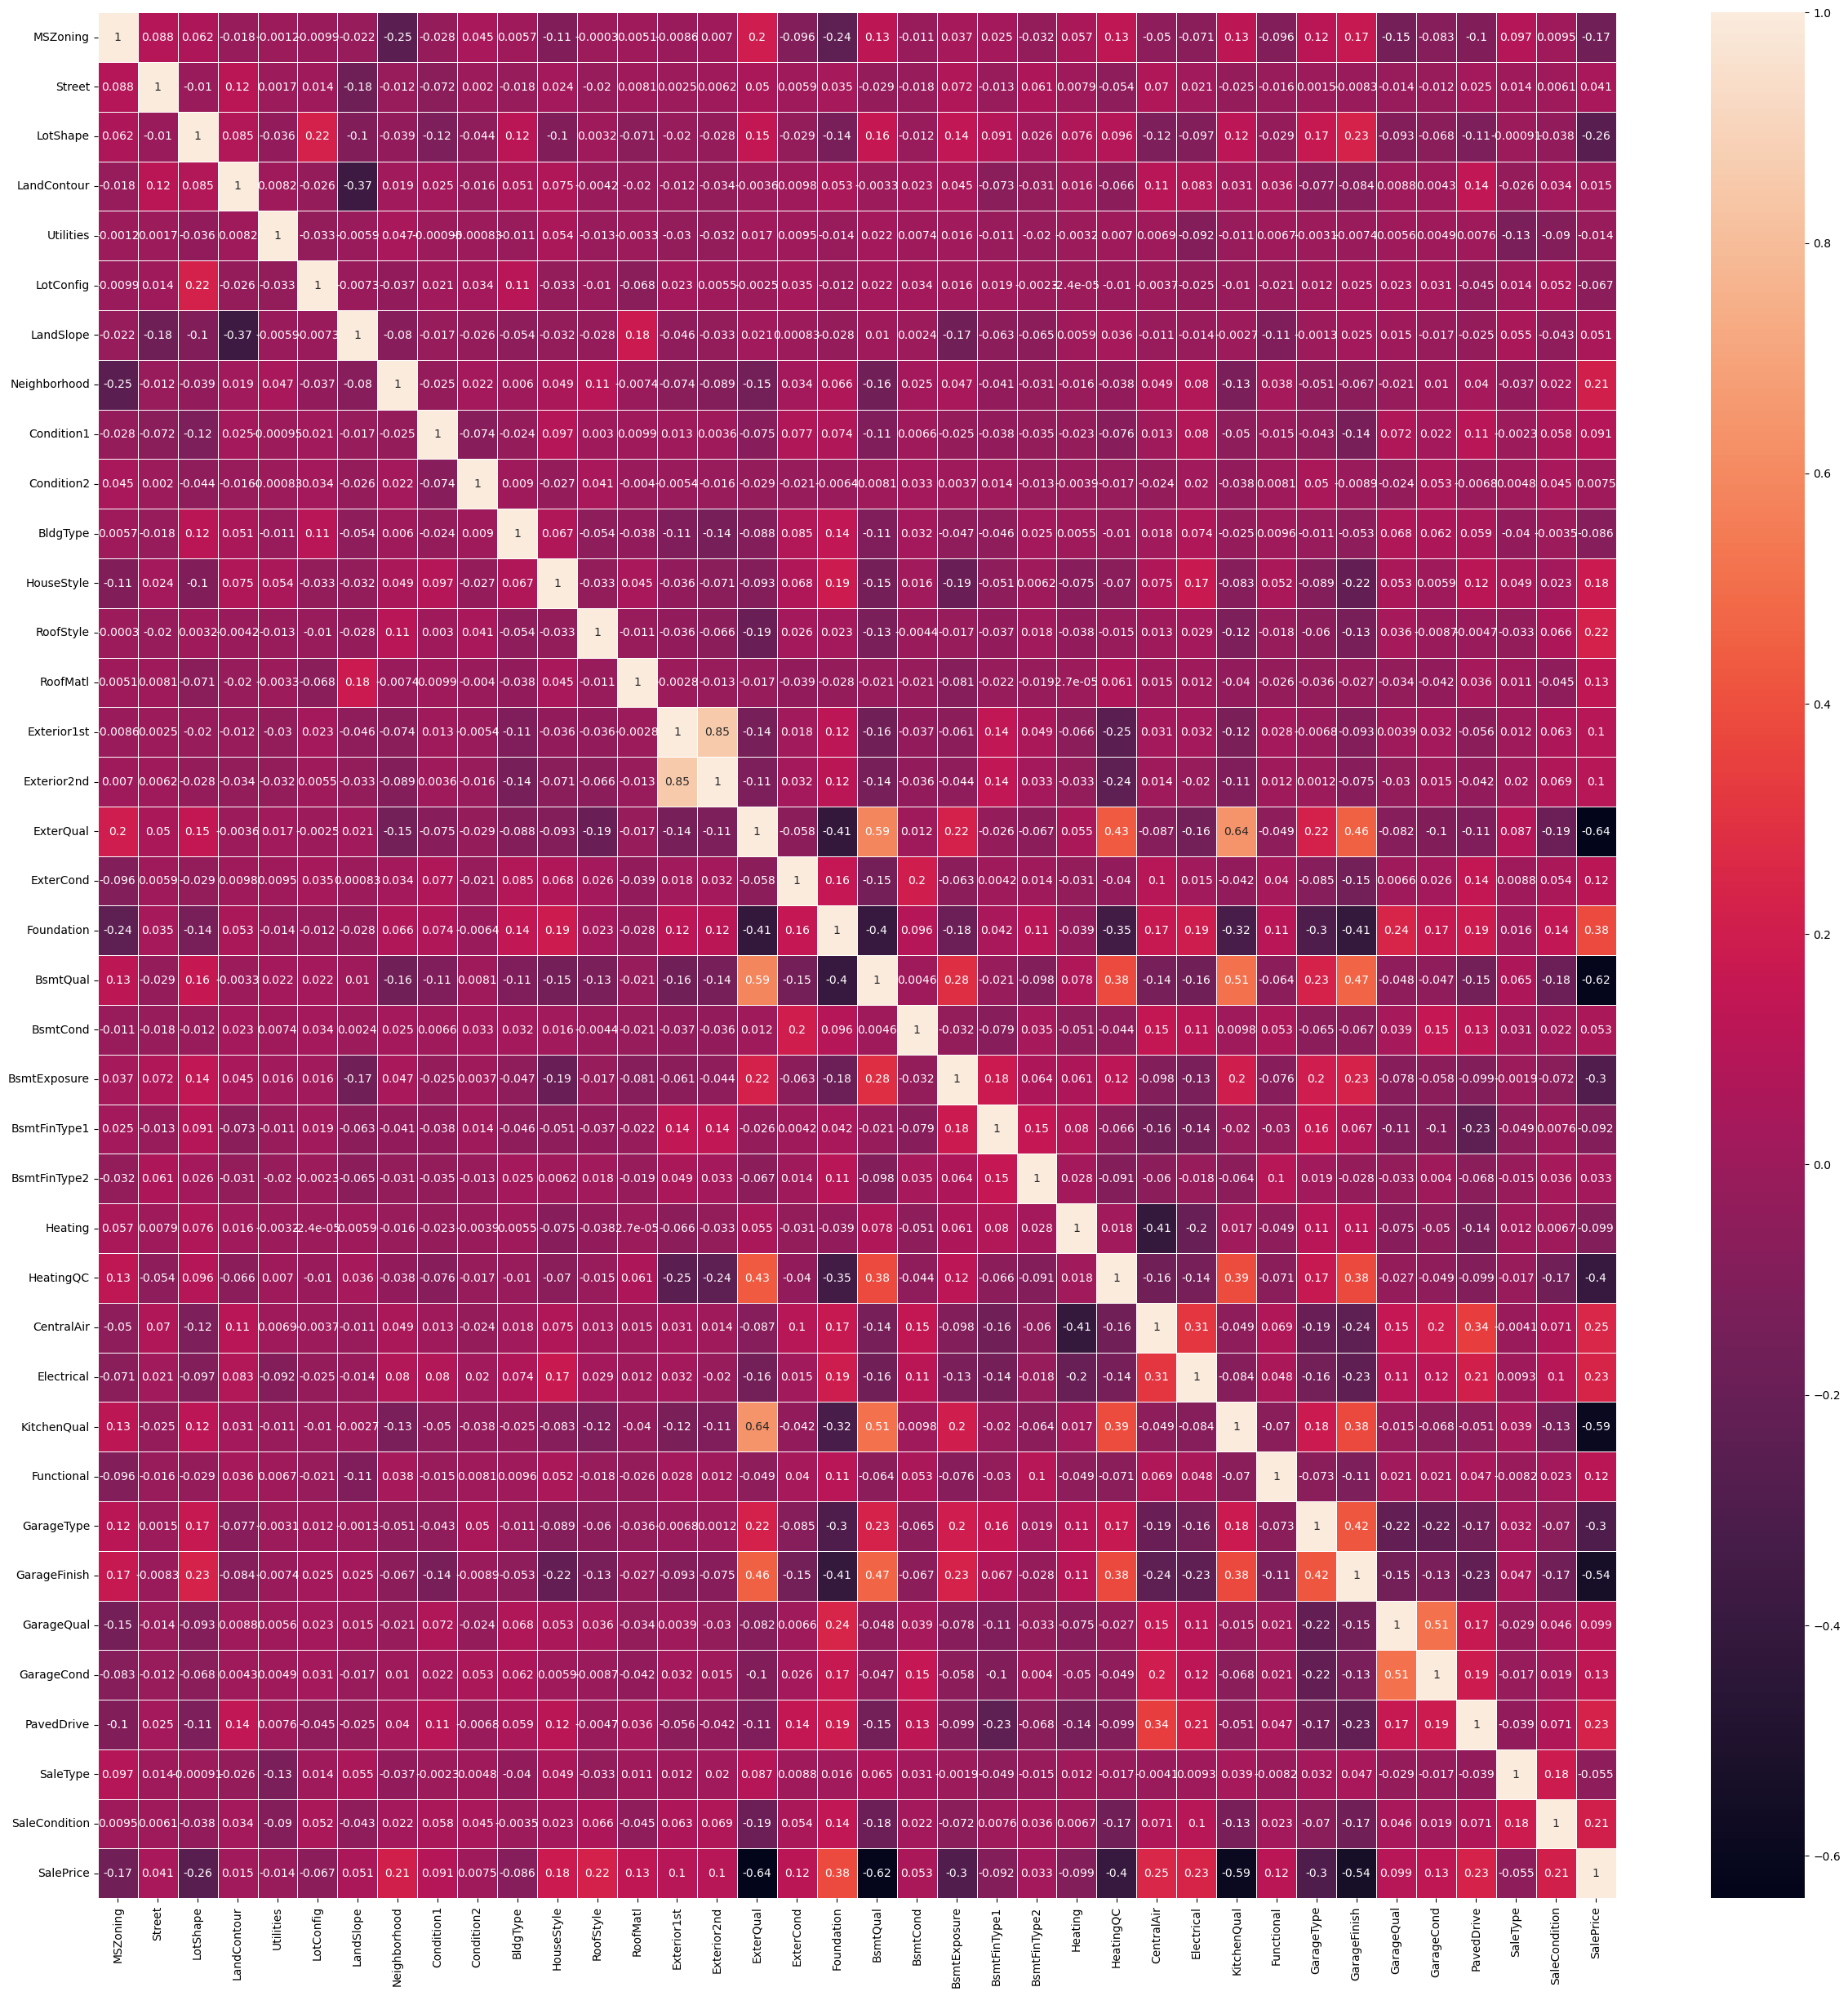

In [43]:
fig, ax = plt.subplots(figsize=(30,30))
sn.heatmap(correlation_coefficient_obj, annot=True, linewidths=.5, ax=ax)
plt.show()

In [44]:
train_modified = train_modified.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'], axis=1)
data_type_check(train_modified)

Interger types: Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Float types: Index(['LotFrontage', 'MasVnrArea', 'GarageYrBlt'], dtype='object')
Object types: Index([], dtype='object')


In [45]:
test_modified = test_modified.drop(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'], axis=1)
data_type_check(test_modified)

Interger types: Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'],
      dtype='object')
Float types: Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')
Object types: Index([], dtype='object')


In [46]:
correlation_coefficient = train_modified.corr()

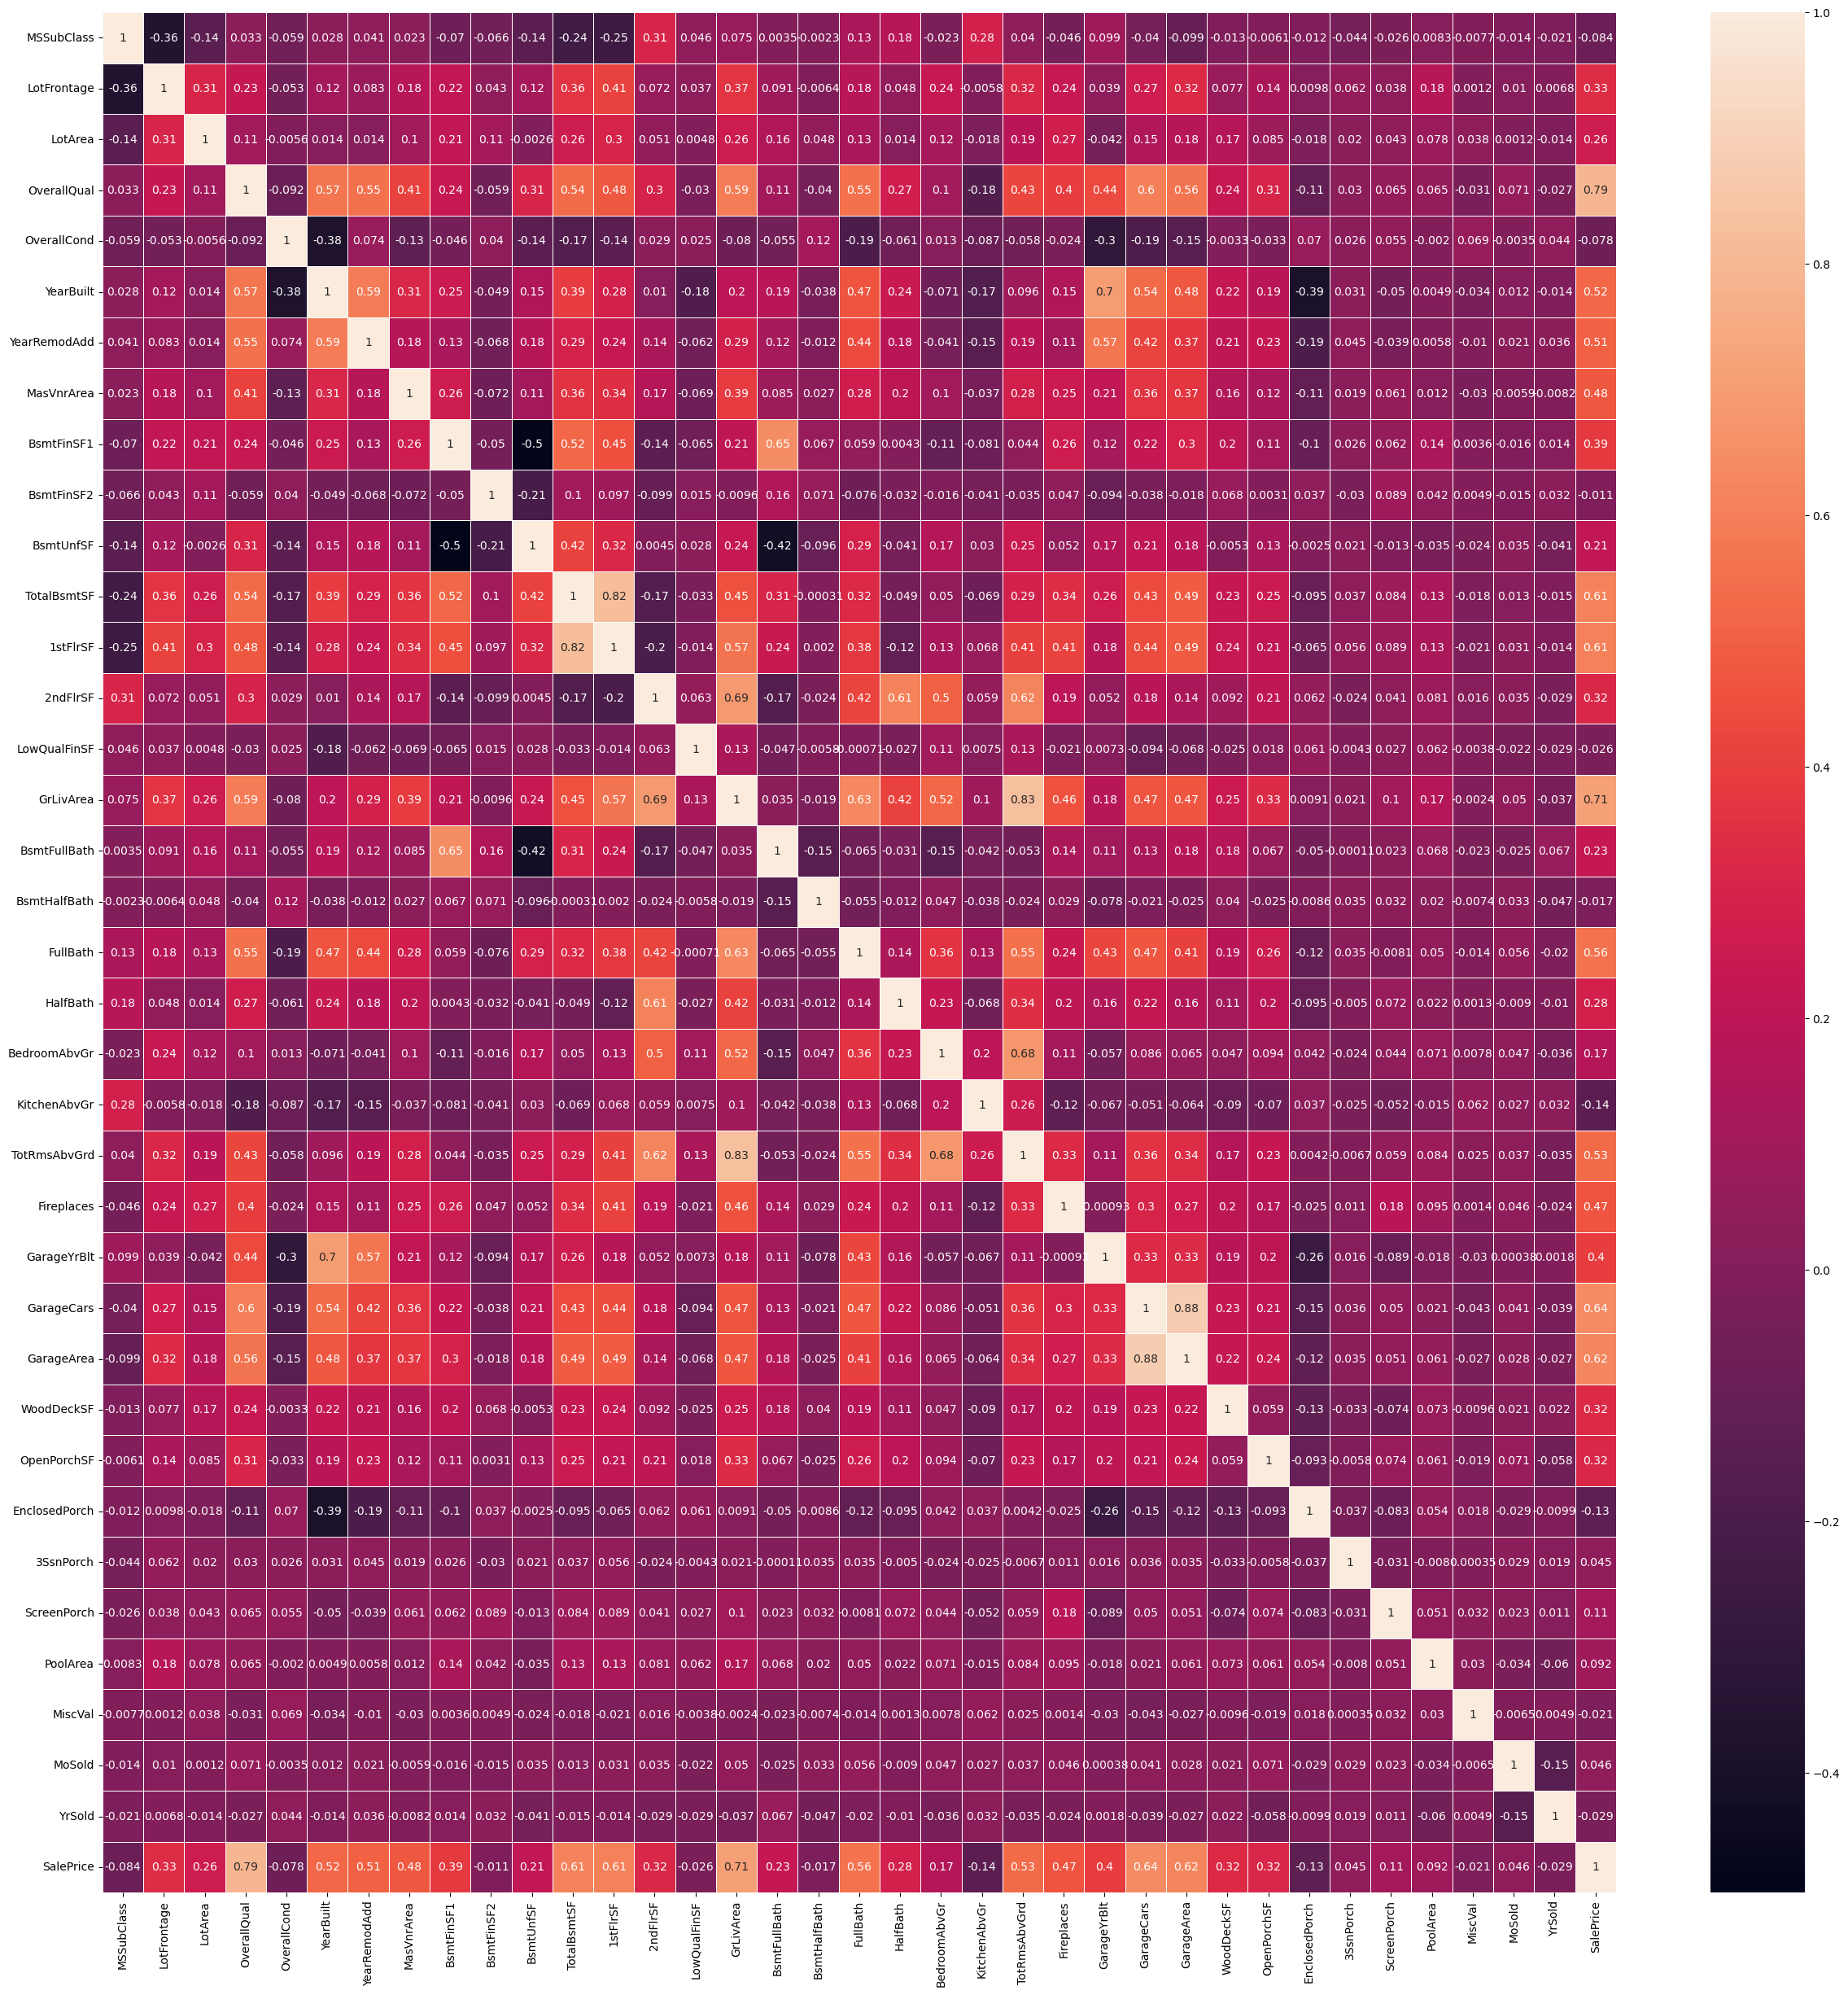

In [47]:
fig, ax = plt.subplots(figsize=(30,30))
sn.heatmap(correlation_coefficient, annot=True, linewidths=.5, ax=ax)
plt.show()

'LotFrontage', 'LotArea', 'OverallQual',  'YearBuilt', 'BsmtFinSF2','BsmtUnfSF', 'BsmtFullBath', 'HalfBath', 'BedroomAbvGr', 'Fireplaces',
'YearRemodAdd',  'TotalBsmtSF', 'MasVnrArea', 'GarageYrBlt', 'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch',
       '1stFlrSF',   'GrLivArea', 
        'FullBath',  
       'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 
       'PoolArea',
        'SalePrice'],
    


In [49]:
X = train_modified.drop(['MSSubClass',   'OverallCond', 'BsmtFinSF1', 
        '2ndFlrSF', 'LowQualFinSF',  'BsmtHalfBath', 'KitchenAbvGr',
          'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold', 'YrSold'], axis=1)
X.head()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea,SalePrice
0,65.0,8450,7,2003,2003,196.0,0,150,856,856,...,8,0,2003.0,2,548,0,61,0,0,208500
1,80.0,9600,6,1976,1976,0.0,0,284,1262,1262,...,6,1,1976.0,2,460,298,0,0,0,181500
2,68.0,11250,7,2001,2002,162.0,0,434,920,920,...,6,1,2001.0,2,608,0,42,0,0,223500
3,60.0,9550,7,1915,1970,0.0,0,540,756,961,...,7,1,1998.0,3,642,0,35,0,0,140000
4,84.0,14260,8,2000,2000,350.0,0,490,1145,1145,...,9,1,2000.0,3,836,192,84,0,0,250000


In [50]:
y = X['SalePrice']
y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [51]:
X = X.drop('SalePrice', axis=1)
X

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea
0,65.0,8450,7,2003,2003,196.0,0,150,856,856,...,3,8,0,2003.0,2,548,0,61,0,0
1,80.0,9600,6,1976,1976,0.0,0,284,1262,1262,...,3,6,1,1976.0,2,460,298,0,0,0
2,68.0,11250,7,2001,2002,162.0,0,434,920,920,...,3,6,1,2001.0,2,608,0,42,0,0
3,60.0,9550,7,1915,1970,0.0,0,540,756,961,...,3,7,1,1998.0,3,642,0,35,0,0
4,84.0,14260,8,2000,2000,350.0,0,490,1145,1145,...,4,9,1,2000.0,3,836,192,84,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,62.0,7917,6,1999,2000,0.0,0,953,953,953,...,3,7,1,1999.0,2,460,0,40,0,0
1456,85.0,13175,6,1978,1988,119.0,163,589,1542,2073,...,3,7,2,1978.0,2,500,349,0,0,0
1457,66.0,9042,7,1941,2006,0.0,0,877,1152,1188,...,4,9,2,1941.0,1,252,0,60,0,0
1458,68.0,9717,5,1950,1996,0.0,1029,0,1078,1078,...,2,5,0,1950.0,1,240,366,0,0,0


In [62]:
X.columns

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'PoolArea'],
      dtype='object')

C:\Users\Mousumi Sarkar\AppData\Local\Temp\ipykernel_9320\3010974068.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


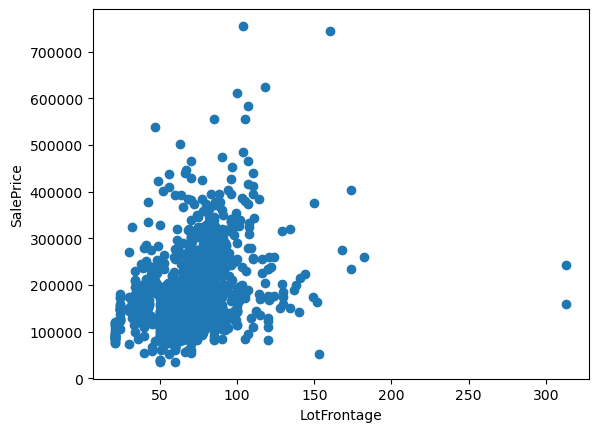

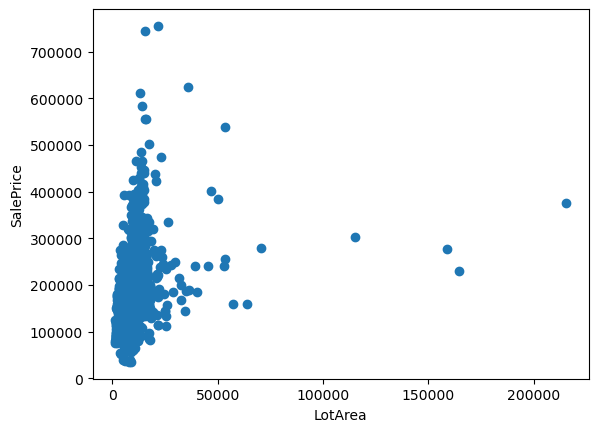

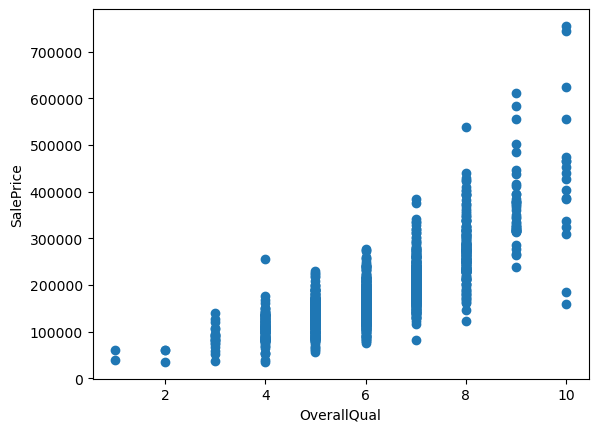

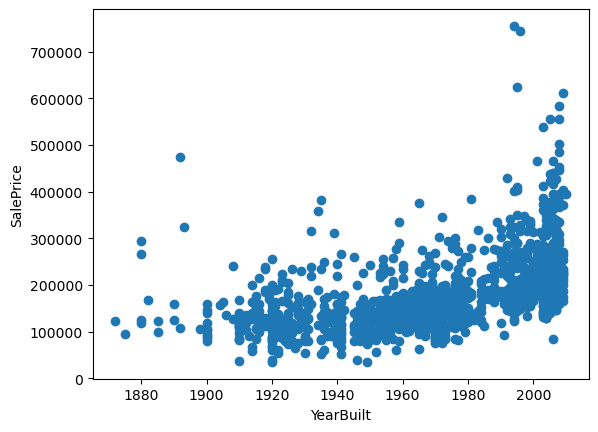

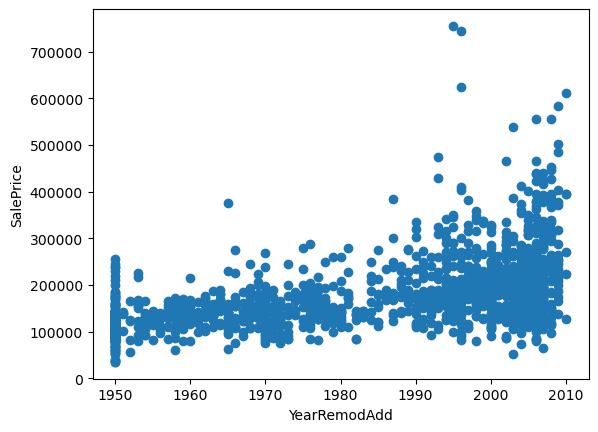

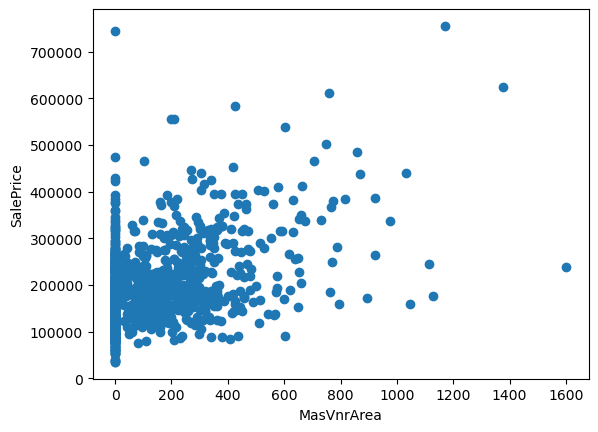

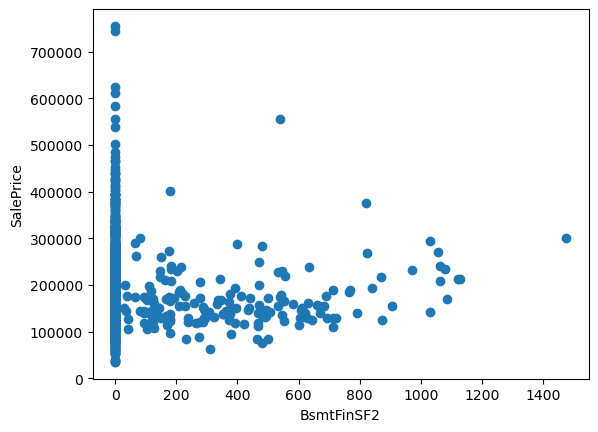

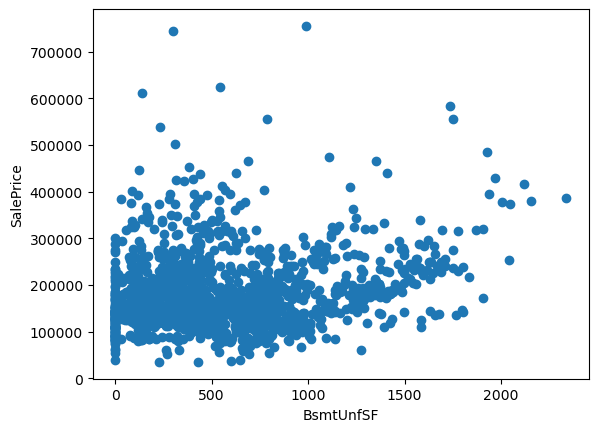

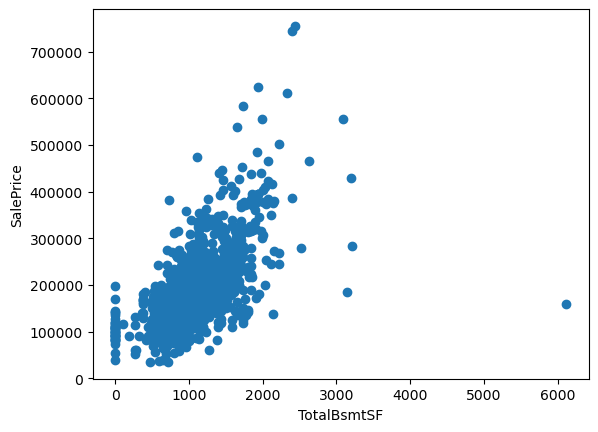

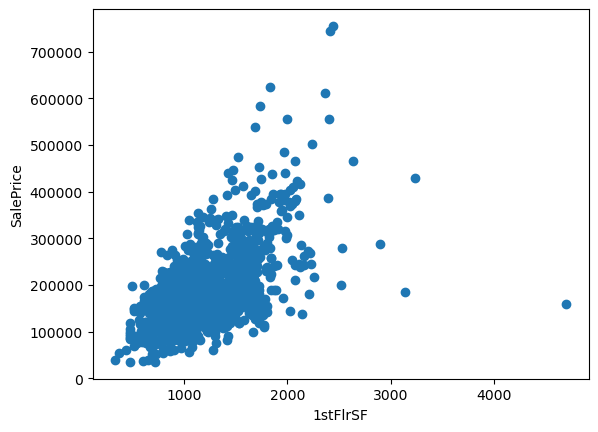

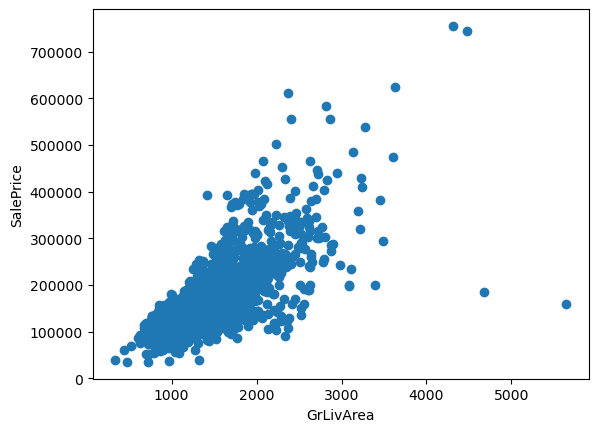

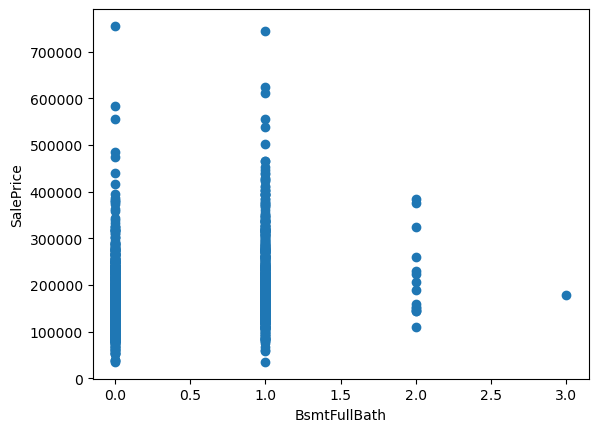

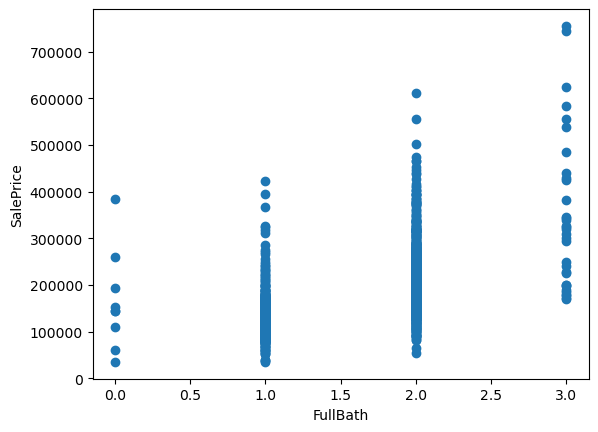

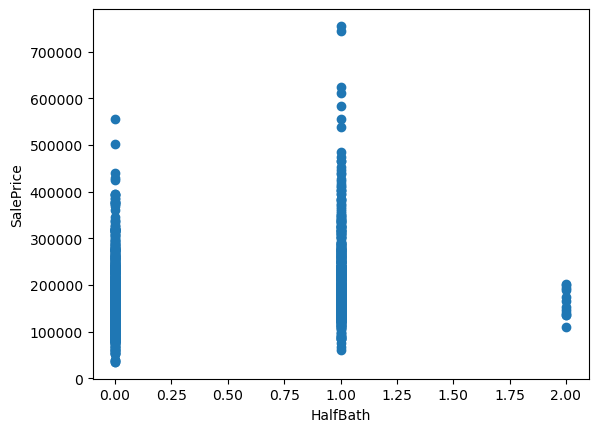

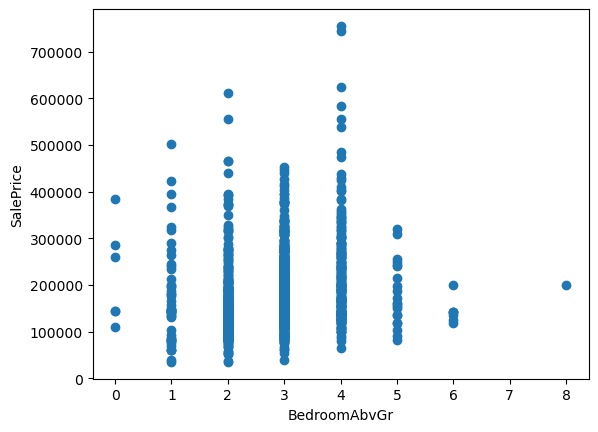

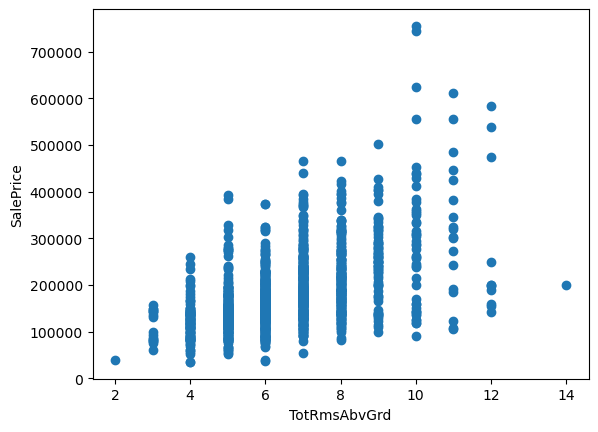

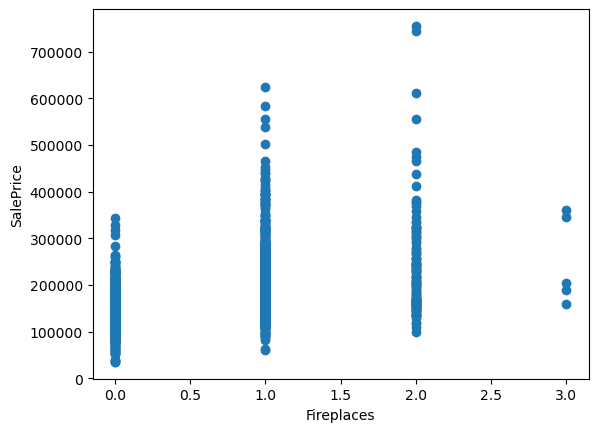

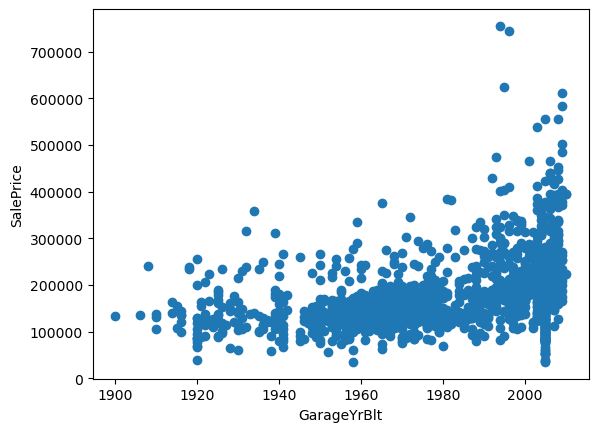

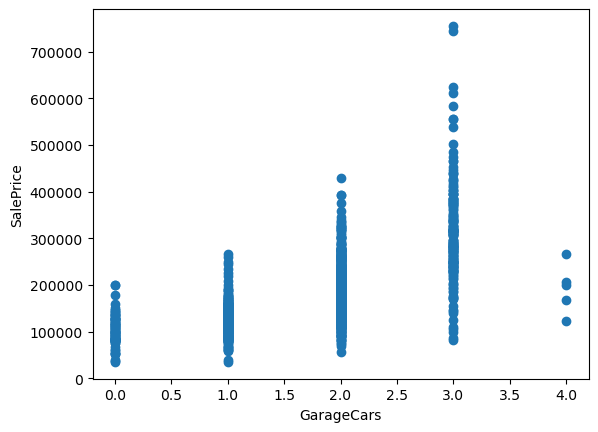

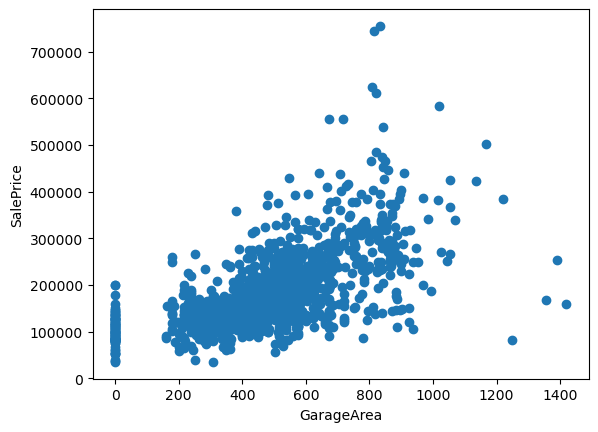

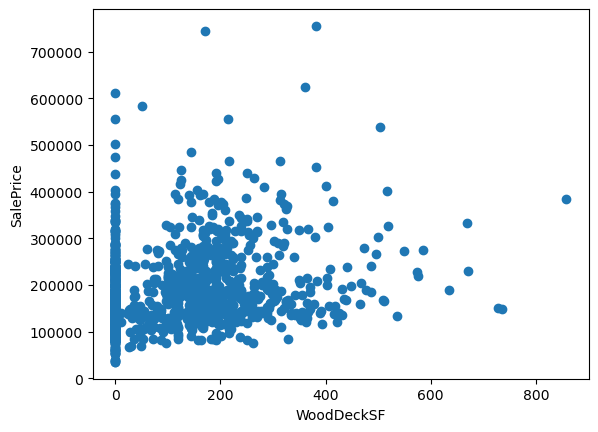

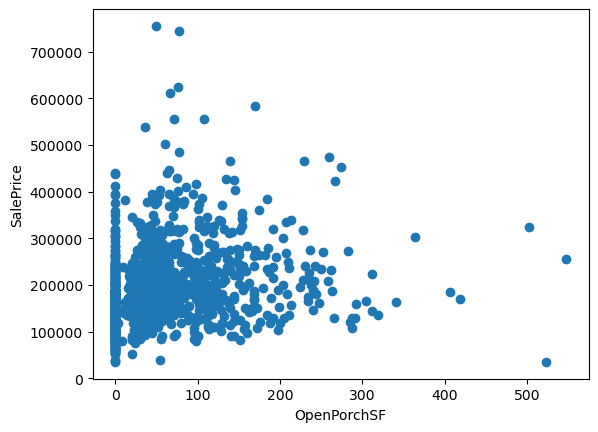

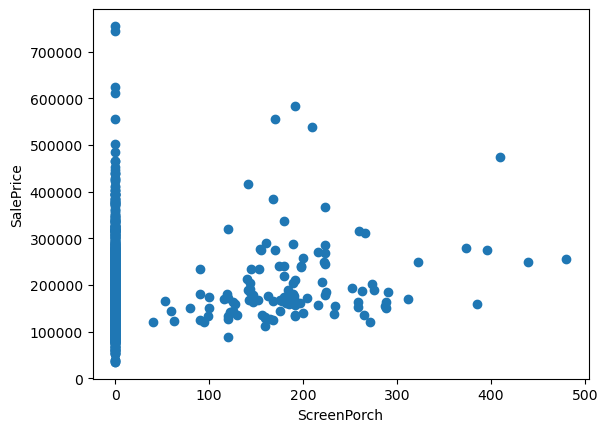

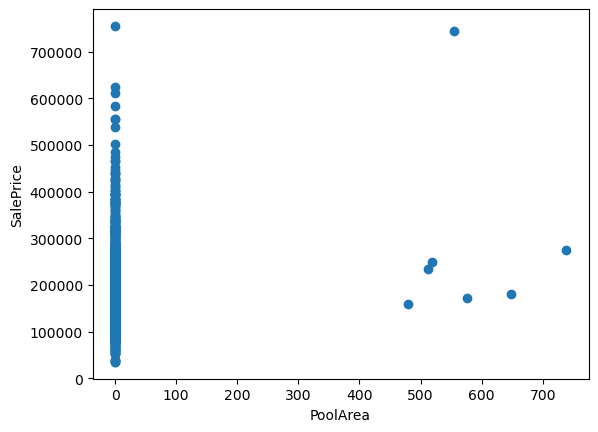

In [52]:
for feature in X.columns:
    plt.figure()
    plt.scatter(X[feature],y)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
X_train.shape

(978, 24)

In [56]:
y_test.shape

(482,)

In [57]:
model = RandomForestRegressor(max_depth=10)

In [58]:
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10)

In [59]:
model.score(X_test, y_test)

0.8601572611226922

In [63]:
col_x = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'ScreenPorch', 'PoolArea']
test_x = test_modified[col_x]
test_x

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,ScreenPorch,PoolArea
0,80.0,11622,5,1961,1961,0.0,144.0,270.0,882.0,896,...,2,5,0,1961.0,1.0,730.0,140,0,120,0
1,81.0,14267,6,1958,1958,108.0,0.0,406.0,1329.0,1329,...,3,6,0,1958.0,1.0,312.0,393,36,0,0
2,74.0,13830,5,1997,1998,0.0,0.0,137.0,928.0,928,...,3,6,1,1997.0,2.0,482.0,212,34,0,0
3,78.0,9978,6,1998,1998,20.0,0.0,324.0,926.0,926,...,3,7,1,1998.0,2.0,470.0,360,36,0,0
4,43.0,5005,8,1992,1992,0.0,0.0,1017.0,1280.0,1280,...,2,5,0,1992.0,2.0,506.0,0,82,144,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,21.0,1936,4,1970,1970,0.0,0.0,546.0,546.0,546,...,3,5,0,2005.0,0.0,0.0,0,0,0,0
1455,21.0,1894,4,1970,1970,0.0,0.0,294.0,546.0,546,...,3,6,0,1970.0,1.0,286.0,0,24,0,0
1456,160.0,20000,5,1960,1996,0.0,0.0,0.0,1224.0,1224,...,4,7,1,1960.0,2.0,576.0,474,0,0,0
1457,62.0,10441,5,1992,1992,0.0,0.0,575.0,912.0,970,...,3,6,0,2005.0,0.0,0.0,80,32,0,0


In [64]:
y_pred = model.predict(test_x)
y_pred

array([129097.64537436, 154890.42569765, 181988.50960087, ...,
       156679.12761085, 119739.24750007, 229924.99555213])

In [66]:
y_pred_series = pd.Series(y_pred)
y_pred_series

0       129097.645374
1       154890.425698
2       181988.509601
3       185080.401246
4       207840.537461
            ...      
1454     84533.953073
1455     88412.326866
1456    156679.127611
1457    119739.247500
1458    229924.995552
Length: 1459, dtype: float64

In [71]:
result = pd.DataFrame()
result['Id'] = test['Id']
result['SalePrice'] = y_pred_series
result

,Id,SalePrice
0,1461,129097.645374
1,1462,154890.425698
2,1463,181988.509601
3,1464,185080.401246
4,1465,207840.537461
...,...,...
1454,2915,84533.953073
1455,2916,88412.326866
1456,2917,156679.127611
1457,2918,119739.247500


In [72]:
result.to_csv('house_price_predict.csv', index=False)